In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import re
import nltk
import gensim

from datetime import datetime
from tqdm import tqdm
from textblob import TextBlob

In [24]:
# Import customs module to tokenize and clean tweet dataset
from clean_tokenizer import tokenize_tweets, basic_clean
data_dir = '../input/english_health_tweets.csv'
tweets_df = pd.read_csv(data_dir) # to be used with cleaned tokenized english only csv
# tweets_df = tokenize_tweets(data_dir) # to be used with non-clean raw health tweets csv
tweets_df.head()

,id,date,timezone,tweet,hashtags,username,name,day,hour,retweet,nlikes,nreplies,nretweets,clean_tweet
0,1244004590699384833,2020-03-28 20:53:01,UTC,"Schlifke said, he and members of the CovidVent...",['#covid19'],KHNews,Kaiser Health News,4,3,False,0,0,1,schlifke say members covidvent coalition help ...
1,1243979929437507585,2020-03-28 19:15:01,UTC,Millions of Americans are seeking care by conn...,"['#covid19', '#telemedicine']",KHNews,Kaiser Health News,6,2,False,6,0,2,millions americans seek care connect doctor el...
2,1243956772123090944,2020-03-28 17:43:00,UTC,We're following the #coronaviruspandemic close...,"['#coronaviruspandemic', '#healthcare', '#heal...",KHNews,Kaiser Health News,5,4,False,0,0,1,follow closely bring best investigation surrou...
3,1243941673270460418,2020-03-28 16:43:00,UTC,About $100 billion of the funding is intended ...,"['#coronavirus', '#relieffunds', '#healthbent']",KHNews,Kaiser Health News,5,12,False,1,0,1,billion fund intend put reimburse eligible hea...
4,1243911473480556544,2020-03-28 14:43:00,UTC,Read KHN's top #COVID19 coverage: The U.S. mil...,['#covid19'],KHNews,Kaiser Health News,6,4,False,4,1,7,read coverage military fly specialize swab ita...


In [25]:
tweets_df['clean_tweet'] = tweets_df.tweet.apply(lambda x: basic_clean(x))
tweets_df.head()

,id,date,timezone,tweet,hashtags,username,name,day,hour,retweet,nlikes,nreplies,nretweets,clean_tweet
0,1244004590699384833,2020-03-28 20:53:01,UTC,"Schlifke said, he and members of the CovidVent...",['#covid19'],KHNews,Kaiser Health News,4,3,False,0,0,1,schlifke said he and members of the covidvent ...
1,1243979929437507585,2020-03-28 19:15:01,UTC,Millions of Americans are seeking care by conn...,"['#covid19', '#telemedicine']",KHNews,Kaiser Health News,6,2,False,6,0,2,millions of americans are seeking care by conn...
2,1243956772123090944,2020-03-28 17:43:00,UTC,We're following the #coronaviruspandemic close...,"['#coronaviruspandemic', '#healthcare', '#heal...",KHNews,Kaiser Health News,5,4,False,0,0,1,we re following the closely to bring you the b...
3,1243941673270460418,2020-03-28 16:43:00,UTC,About $100 billion of the funding is intended ...,"['#coronavirus', '#relieffunds', '#healthbent']",KHNews,Kaiser Health News,5,12,False,1,0,1,about billion of the funding is intended to a...
4,1243911473480556544,2020-03-28 14:43:00,UTC,Read KHN's top #COVID19 coverage: The U.S. mil...,['#covid19'],KHNews,Kaiser Health News,6,4,False,4,1,7,read khn s top coverage the u s military is fl...


In [26]:
# Define helper functions to compute polarity/subjectivity scores
def get_sentiment_polarity(tweet):
    polarity = TextBlob(tweet).sentiment.polarity
    return polarity

def get_sentiment_subjectivity(tweet):
    subjectivity = TextBlob(tweet).sentiment.subjectivity
    return subjectivity

In [27]:
%%time
# Compute polarity/subjectivity scores for all tweets and create columns in dataframe
tweets_df['polarity'] = tweets_df.clean_tweet.apply(lambda x: get_sentiment_polarity(x))
tweets_df['subjectivity'] = tweets_df.clean_tweet.apply(lambda x: get_sentiment_subjectivity(x))

Wall time: 1min 8s


In [28]:
tweets_df[['id', 'date', 'username', 'clean_tweet', 'polarity', 'subjectivity']].sample(n=10)

,id,date,username,clean_tweet,polarity,subjectivity
129737,987133879692812288,2018-04-20 01:00:31,cnnhealth,marijuana derived drug for epilepsy gets fda c...,0.00000,0.000000
88228,740042024842199042,2016-06-07 04:45:42,bbchealth,bed blocking delays up to five years,0.00000,0.000000
151315,949112941944758273,2018-01-05 02:58:53,NYTHealth,this cat sensed death what if computers could ...,0.00000,0.000000
131946,896038513120092161,2017-08-11 16:00:03,cnnhealth,the world’s largest gathering of twins,0.00000,0.000000
123625,603889330906636288,2015-05-28 11:43:30,GdnHealthcare,are you a member of our network join here for ...,0.40000,0.800000
23702,439164812535144448,2014-02-27 22:27:05,NPRHealth,young doesn t mean invincible when it comes to...,-0.10625,0.543750
40094,794622899063783424,2016-11-04 19:30:37,latimeshealth,of dems and of reps are stressed about the e...,0.00000,0.000000
95966,505423506096799747,2014-08-29 18:35:28,foxnewshealth,white house orders us labs to take inventory o...,0.00000,0.000000
19971,664925150672912388,2015-11-12 21:58:04,NPRHealth,rounding up the last of a deadly cattle virus,-0.10000,0.233333
50818,644263982488944641,2015-09-16 21:37:57,WSJhealth,aerie pharmaceuticals shares rise on trial res...,0.00000,0.000000


### Visualizing Polarity & Subjectivity Sentiments over Time 

In [29]:
# this is only to choose particular vibrant colors when plotting
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)


# get news sources and their labels for plotting
news_sources = ['KHNews', 'NPRHealth', 'USNewsHealth', 'HarvardHealth','WSJhealth', 'Reuters_Health',
                'NBCNewsHealth', 'latimeshealth' 'NYTHealth', 'bbchealth', 'foxnewshealth', 'GdnHealthcare',
                'cnnhealth', 'TIMEHealth']

source_label = ['Kaiser Health News', "NPR Health", "US News Health", "Harvard Health", "WSJ Health", "Reuters Heath",
               "NBC News Health", "LA Times Health", "NYT Health", "BBC Health", "Fox News Health", "GDN Healthcare",
               "CNN Health", "TIME Health"]

In [30]:
from datetime import datetime

# Convert the 'date' field into a datetime object
# as this allows you to extract the elements of the date like year, month, etc.
tweets_df['date'] = tweets_df.date.apply(lambda x: datetime.fromisoformat(x))

# Create month and year columns
tweets_df['month'] = tweets_df.date.apply(lambda x: x.month)
tweets_df['year'] = tweets_df.date.apply(lambda x: x.year)

# Combine the month and year into one field 'mydate'
tweets_df['mydate'] = tweets_df['year'].map(str)+ '-' + tweets_df['month'].map(str)

# Convert the 'mydate' field into a datetime object with the format '%Y-%m'
tweets_df['mydate'] = pd.to_datetime(tweets_df['mydate'], format='%Y-%m').dt.strftime('%Y-%m')

In [31]:
# Create a dataframe grouped by the 'username' and 'mydate' fields
# this take each month/year and username and gets the average score
gm_df = pd.DataFrame(tweets_df.groupby(['username', 'mydate'], as_index=False).mean())
gm_df

,username,mydate,id,day,hour,retweet,nlikes,nreplies,nretweets,polarity,subjectivity,month,year
0,GdnHealthcare,2014-12,5.474329e+17,4.153846,12.378698,False,2.603550,0.591716,5.798817,0.133990,0.321333,12.0,2014.0
1,GdnHealthcare,2015-01,5.564658e+17,4.174014,11.361949,False,2.426914,0.747100,7.090487,0.105964,0.317537,1.0,2015.0
2,GdnHealthcare,2015-02,5.668580e+17,3.955621,11.571006,False,2.775148,0.745562,6.884615,0.120066,0.313297,2.0,2015.0
3,GdnHealthcare,2015-03,5.772313e+17,3.961631,11.105516,False,2.683453,0.712230,6.362110,0.115387,0.307757,3.0,2015.0
4,GdnHealthcare,2015-04,5.889002e+17,3.807792,10.955844,False,2.402597,0.433766,5.877922,0.137652,0.390746,4.0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,latimeshealth,2019-11,1.195259e+18,4.192308,11.730769,False,3.384615,0.653846,4.076923,0.044590,0.256255,11.0,2019.0
954,latimeshealth,2019-12,1.205999e+18,4.000000,12.100000,False,3.300000,0.400000,4.166667,0.084804,0.414674,12.0,2019.0
955,latimeshealth,2020-01,1.218654e+18,4.069767,11.837209,False,7.465116,0.488372,4.488372,0.079046,0.276888,1.0,2020.0
956,latimeshealth,2020-02,1.229510e+18,3.901961,10.960784,False,2.725490,0.196078,3.450980,0.012393,0.290779,2.0,2020.0


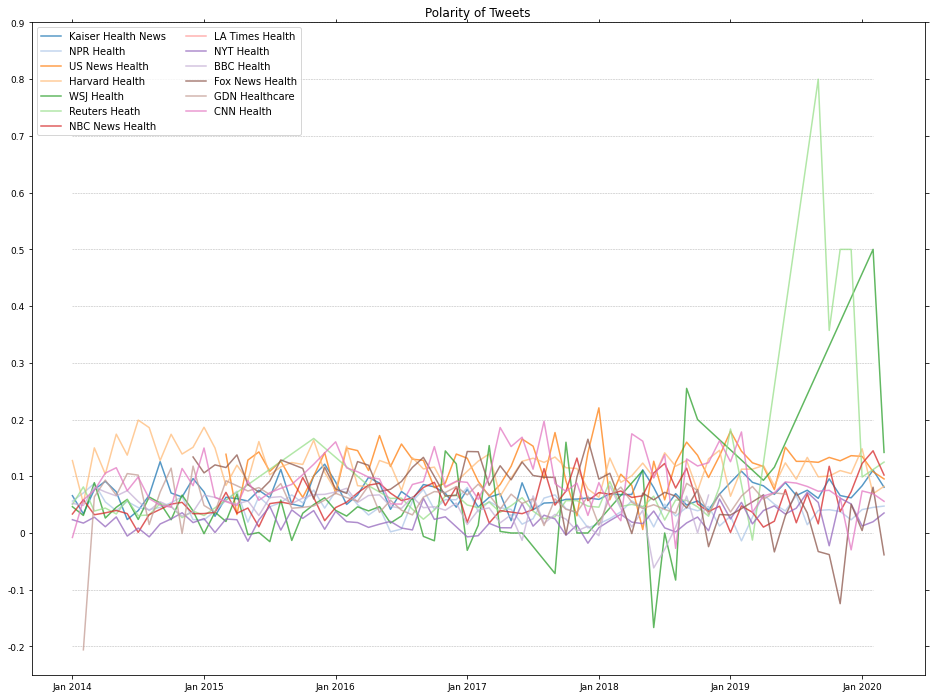

In [42]:
# Set the figure size
fig = plt.figure(figsize=(16, 12))

# Set the ylimits
plt.ylim(-0.25, 0.9)

# Make sure your axis ticks are large enough to be easily read.
plt.yticks([-0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
           [str(x) for x in [-0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]],
           fontsize=9)

plt.xticks([0, 12, 24, 36, 48, 60, 72],
           ['Jan 2014', 'Jan 2015', 'Jan 2016', 'Jan 2017', 'Jan 2018', 'Jan 2019', 'Jan 2020'], fontsize=9)


# Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
for y in [-0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    plt.plot(range(0, 74), [y] * len(range(0, 74)), "--", lw=0.5, color="black", alpha=0.3)

# Remove the tick marks; they are unnecessary with the tick lines we just plotted.
plt.tick_params(axis="both", which="both", bottom="off", top="off",
                labelbottom="on", left="off", right="off", labelleft="on")

# Set a counter at 0 to go through each news source
r = 0
# loop through each source in the news sources list
for source in news_sources:
    # Plot each line separately with its own color, using the Tableau 20
    # color set in order.
    plt.plot(gm_df.loc[gm_df['username'] == source].mydate.values,
            gm_df.loc[gm_df['username'] == source].polarity.values,
            lw=1.5, color=tableau20[r], alpha = 0.75, label = source_label[r])

    r += 1

# Format the x-axis data under the correct date format and plot
plt.format_xdata = mdates.DateFormatter('%Y-%m')

plt.title("Polarity of Tweets")
plt.legend(ncol=2, loc='upper left')
plt.show()

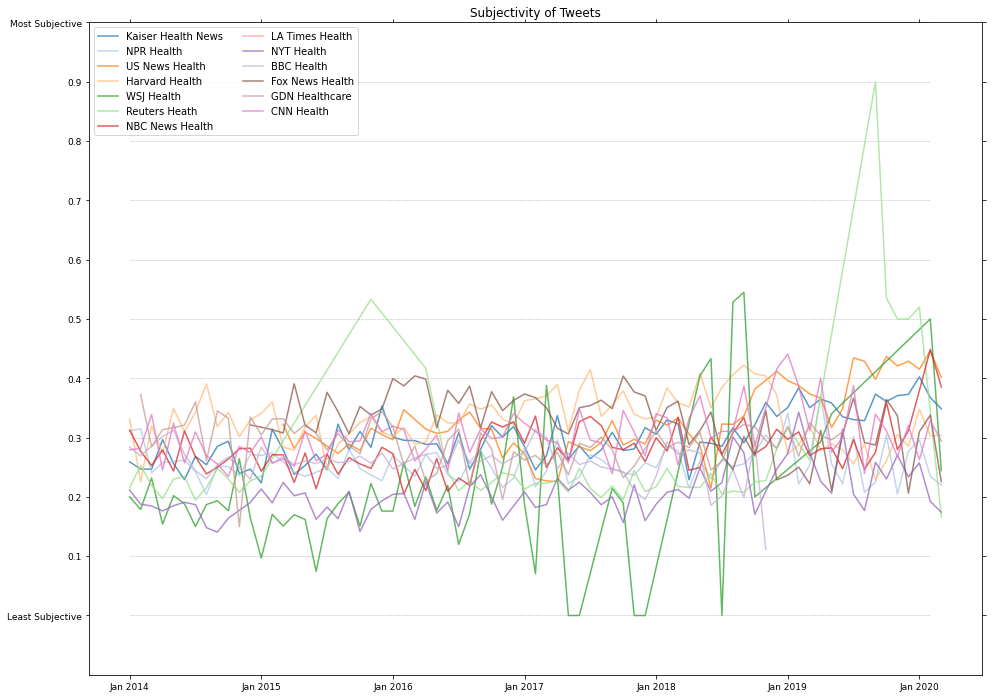

In [44]:
# Set the figure size
fig = plt.figure(figsize=(16, 12))

# Set the y limits
plt.ylim(-0.1, 1)

# Make sure your axis ticks are large enough to be easily read
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
           [str(x) for x in ["Least Subjective", 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, "Most Subjective"]],
           fontsize=9)

plt.xticks([0, 12, 24, 36, 48, 60, 72],
           ['Jan 2014', 'Jan 2015', 'Jan 2016', 'Jan 2017', 'Jan 2018', 'Jan 2019', 'Jan 2020'], fontsize=9)



# Provide tick lines across the plot to help your viewers trace along
# the axis ticks. Make sure that the lines are light and small so they
# don't obscure the primary data lines.
for y in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    plt.plot(range(0, 74), [y] * len(range(0, 74)), "--", lw=0.5, color="black", alpha=0.3)

# Remove the tick marks; they are unnecessary with the tick lines we just plotted.
plt.tick_params(axis="both", which="both", bottom="off", top="off",
                labelbottom="on", left="off", right="off", labelleft="on")

# Set a counter at 0 to go through each news source
r = 0
# Loop through each source in the news sources list
for source in news_sources:
    # Plot each line separately with its own color, using the Tableau 20
    # color set in order.
    plt.plot(gm_df.loc[gm_df['username'] == source].mydate.values,
             gm_df.loc[gm_df['username'] == source].subjectivity.values,
             lw=1.5, color=tableau20[r], alpha=0.75, label=source_label[r])

    r += 1

# Format the x-axis data under the correct date format and plot
plt.format_xdata = mdates.DateFormatter('%Y-%m')

plt.title("Subjectivity of Tweets")
plt.legend(ncol=2, loc='upper left')
plt.show()
